In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [61]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, load_model # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [8]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [9]:
print(data[0].shape)
print(data[0,0])
print(data[0,1:].reshape(28,28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [16]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [13]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

3.0

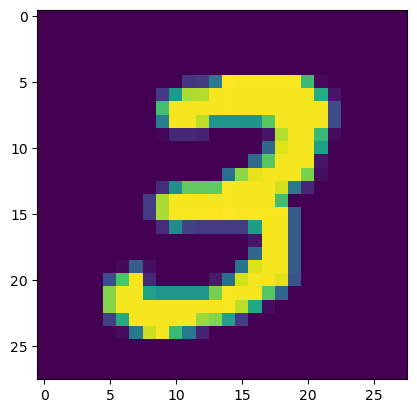

In [17]:
plt.imshow(data[7,1:].reshape(28,-1))
data[7,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. 데이터 생성 & 전처리

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

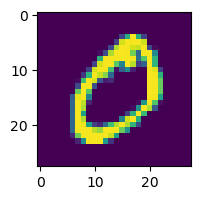

In [25]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [26]:
Y_train[1]

0

In [27]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [28]:
# 훈련셋(학습시 사용), 검증셋(fit에서 사용), 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [32]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
# X_train = X_train.reshape(50000, 784).astype('float32')/255.0
# X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
# X_test  = X_test.reshape(-1,784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [37]:
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape 

((700, 784), (700,), (300, 784), (300,))

5


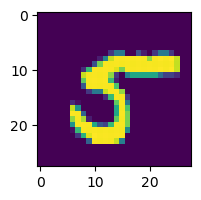

In [42]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[5].reshape(-1, 28))
print(Y_train[5])
plt.show()

In [45]:
# 종속변수 전처리 : 원핫인코딩 (to_categorical(넘파이배열 반환) pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape :', Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
print('원핫인코딩 후 shape :', Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape : (700,) (300,) (10000,)
원핫인코딩 후 shape : (700, 10) (300, 10) (10000, 10)


In [51]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


## 2. 모델구성하기

In [53]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [62]:
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 36ms/step - loss: 2.2986 - accuracy: 0.1286 - val_loss: 2.2896 - val_accuracy: 0.1100
Epoch 2/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2795 - accuracy: 0.1600 - val_loss: 2.2763 - val_accuracy: 0.1033
Epoch 3/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.2623 - accuracy: 0.1671 - val_loss: 2.2606 - val_accuracy: 0.1233
Epoch 4/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2429 - accuracy: 0.1843 - val_loss: 2.2404 - val_accuracy: 0.1200
Epoch 5/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2193 - accuracy: 0.1914 - val_loss: 2.2163 - val_accuracy: 0.1533
Epoch 6/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.1923 - accuracy: 0.2057 - val_loss: 2.1923 - val_accuracy: 0.1633
Epoch 7/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.1659 - accuracy: 0.2043 - val_loss: 2.1686 - val_accuracy: 0.1767
Epoch 8/1200


Epoch 59/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5563 - accuracy: 0.4271 - val_loss: 1.6424 - val_accuracy: 0.3833
Epoch 60/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5494 - accuracy: 0.4243 - val_loss: 1.6382 - val_accuracy: 0.3833
Epoch 61/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5423 - accuracy: 0.4229 - val_loss: 1.6336 - val_accuracy: 0.3900
Epoch 62/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5366 - accuracy: 0.4243 - val_loss: 1.6298 - val_accuracy: 0.3933
Epoch 63/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5312 - accuracy: 0.4300 - val_loss: 1.6248 - val_accuracy: 0.4000
Epoch 64/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5243 - accuracy: 0.4200 - val_loss: 1.6200 - val_accuracy: 0.4067
Epoch 65/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5177 - accuracy: 0.4214 - val_loss: 1.6156 - val_accuracy: 0.4067
Epoch 6

7/7 [==============================] - 0s 9ms/step - loss: 1.1499 - accuracy: 0.5700 - val_loss: 1.4829 - val_accuracy: 0.4367
Epoch 174/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1474 - accuracy: 0.5686 - val_loss: 1.4818 - val_accuracy: 0.4333
Epoch 175/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.1463 - accuracy: 0.5729 - val_loss: 1.4836 - val_accuracy: 0.4433
Epoch 176/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1437 - accuracy: 0.5700 - val_loss: 1.4846 - val_accuracy: 0.4300
Epoch 177/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1416 - accuracy: 0.5686 - val_loss: 1.4838 - val_accuracy: 0.4333
Epoch 178/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1395 - accuracy: 0.5700 - val_loss: 1.4867 - val_accuracy: 0.4400
Epoch 179/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1374 - accuracy: 0.5671 - val_loss: 1.4861 - val_accuracy: 0.4400
Epoch 180/1200
7/7 [

Epoch 231/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0493 - accuracy: 0.5971 - val_loss: 1.5140 - val_accuracy: 0.4367
Epoch 232/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0485 - accuracy: 0.5971 - val_loss: 1.5157 - val_accuracy: 0.4367
Epoch 233/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0466 - accuracy: 0.5957 - val_loss: 1.5159 - val_accuracy: 0.4333
Epoch 234/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0452 - accuracy: 0.5986 - val_loss: 1.5153 - val_accuracy: 0.4367
Epoch 235/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0435 - accuracy: 0.6071 - val_loss: 1.5146 - val_accuracy: 0.4433
Epoch 236/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0427 - accuracy: 0.6043 - val_loss: 1.5164 - val_accuracy: 0.4433
Epoch 237/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0408 - accuracy: 0.6071 - val_loss: 1.5224 - val_accuracy: 0.4267
Epoch 

Epoch 289/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9772 - accuracy: 0.6314 - val_loss: 1.5773 - val_accuracy: 0.4267
Epoch 290/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9757 - accuracy: 0.6286 - val_loss: 1.5767 - val_accuracy: 0.4233
Epoch 291/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9753 - accuracy: 0.6257 - val_loss: 1.5793 - val_accuracy: 0.4200
Epoch 292/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9741 - accuracy: 0.6314 - val_loss: 1.5785 - val_accuracy: 0.4233
Epoch 293/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9726 - accuracy: 0.6286 - val_loss: 1.5828 - val_accuracy: 0.4200
Epoch 294/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9712 - accuracy: 0.6214 - val_loss: 1.5815 - val_accuracy: 0.4233
Epoch 295/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9709 - accuracy: 0.6271 - val_loss: 1.5829 - val_accuracy: 0.4167
Epoch 

Epoch 347/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9206 - accuracy: 0.6514 - val_loss: 1.6547 - val_accuracy: 0.4233
Epoch 348/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9195 - accuracy: 0.6514 - val_loss: 1.6552 - val_accuracy: 0.4233
Epoch 349/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9185 - accuracy: 0.6471 - val_loss: 1.6507 - val_accuracy: 0.4267
Epoch 350/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9183 - accuracy: 0.6486 - val_loss: 1.6565 - val_accuracy: 0.4267
Epoch 351/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9174 - accuracy: 0.6457 - val_loss: 1.6631 - val_accuracy: 0.4200
Epoch 352/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9173 - accuracy: 0.6443 - val_loss: 1.6608 - val_accuracy: 0.4267
Epoch 353/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9157 - accuracy: 0.6500 - val_loss: 1.6596 - val_accuracy: 0.4200
Epoch 

Epoch 405/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8733 - accuracy: 0.6614 - val_loss: 1.7421 - val_accuracy: 0.4033
Epoch 406/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8725 - accuracy: 0.6629 - val_loss: 1.7439 - val_accuracy: 0.4033
Epoch 407/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8716 - accuracy: 0.6614 - val_loss: 1.7417 - val_accuracy: 0.4033
Epoch 408/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8713 - accuracy: 0.6614 - val_loss: 1.7476 - val_accuracy: 0.4033
Epoch 409/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8706 - accuracy: 0.6629 - val_loss: 1.7478 - val_accuracy: 0.4033
Epoch 410/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8702 - accuracy: 0.6629 - val_loss: 1.7504 - val_accuracy: 0.4033
Epoch 411/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8686 - accuracy: 0.6600 - val_loss: 1.7484 - val_accuracy: 0.4067
Epoch 

Epoch 463/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8339 - accuracy: 0.6700 - val_loss: 1.8317 - val_accuracy: 0.4033
Epoch 464/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8332 - accuracy: 0.6700 - val_loss: 1.8293 - val_accuracy: 0.4033
Epoch 465/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8325 - accuracy: 0.6743 - val_loss: 1.8380 - val_accuracy: 0.4067
Epoch 466/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8320 - accuracy: 0.6700 - val_loss: 1.8408 - val_accuracy: 0.4067
Epoch 467/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8316 - accuracy: 0.6714 - val_loss: 1.8362 - val_accuracy: 0.4067
Epoch 468/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8307 - accuracy: 0.6729 - val_loss: 1.8407 - val_accuracy: 0.4033
Epoch 469/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8302 - accuracy: 0.6743 - val_loss: 1.8466 - val_accuracy: 0.4033
Epoch

Epoch 578/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7715 - accuracy: 0.6971 - val_loss: 2.0283 - val_accuracy: 0.4167
Epoch 579/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7709 - accuracy: 0.6929 - val_loss: 2.0332 - val_accuracy: 0.4200
Epoch 580/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7708 - accuracy: 0.6957 - val_loss: 2.0328 - val_accuracy: 0.4167
Epoch 581/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7706 - accuracy: 0.6943 - val_loss: 2.0385 - val_accuracy: 0.4167
Epoch 582/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7698 - accuracy: 0.6929 - val_loss: 2.0427 - val_accuracy: 0.4167
Epoch 583/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7694 - accuracy: 0.6957 - val_loss: 2.0425 - val_accuracy: 0.4133
Epoch 584/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7692 - accuracy: 0.6971 - val_loss: 2.0494 - val_accuracy: 0.4200
Epoch 

Epoch 693/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7256 - accuracy: 0.7029 - val_loss: 2.2500 - val_accuracy: 0.4133
Epoch 694/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7256 - accuracy: 0.7043 - val_loss: 2.2574 - val_accuracy: 0.4133
Epoch 695/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7245 - accuracy: 0.7029 - val_loss: 2.2679 - val_accuracy: 0.4233
Epoch 696/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7249 - accuracy: 0.7086 - val_loss: 2.2648 - val_accuracy: 0.4167
Epoch 697/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7238 - accuracy: 0.7086 - val_loss: 2.2628 - val_accuracy: 0.4167
Epoch 698/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7234 - accuracy: 0.7086 - val_loss: 2.2638 - val_accuracy: 0.4167
Epoch 699/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7229 - accuracy: 0.7057 - val_loss: 2.2709 - val_accuracy: 0.4267
Epoch 

Epoch 751/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7051 - accuracy: 0.7086 - val_loss: 2.3799 - val_accuracy: 0.4267
Epoch 752/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7051 - accuracy: 0.7071 - val_loss: 2.3756 - val_accuracy: 0.4233
Epoch 753/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7048 - accuracy: 0.7114 - val_loss: 2.3857 - val_accuracy: 0.4267
Epoch 754/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7045 - accuracy: 0.7086 - val_loss: 2.3868 - val_accuracy: 0.4200
Epoch 755/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7040 - accuracy: 0.7086 - val_loss: 2.3855 - val_accuracy: 0.4300
Epoch 756/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.7129 - val_loss: 2.3926 - val_accuracy: 0.4267
Epoch 757/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.7100 - val_loss: 2.3930 - val_accuracy: 0.4200
Epoch

Epoch 866/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6700 - accuracy: 0.7357 - val_loss: 2.6333 - val_accuracy: 0.4267
Epoch 867/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6697 - accuracy: 0.7371 - val_loss: 2.6302 - val_accuracy: 0.4233
Epoch 868/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6695 - accuracy: 0.7329 - val_loss: 2.6413 - val_accuracy: 0.4233
Epoch 869/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6691 - accuracy: 0.7371 - val_loss: 2.6399 - val_accuracy: 0.4233
Epoch 870/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6688 - accuracy: 0.7386 - val_loss: 2.6463 - val_accuracy: 0.4267
Epoch 871/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6683 - accuracy: 0.7343 - val_loss: 2.6520 - val_accuracy: 0.4233
Epoch 872/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6685 - accuracy: 0.7371 - val_loss: 2.6484 - val_accuracy: 0.4233
Epoch 

Epoch 924/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6541 - accuracy: 0.7429 - val_loss: 2.7744 - val_accuracy: 0.4367
Epoch 925/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6538 - accuracy: 0.7443 - val_loss: 2.7818 - val_accuracy: 0.4400
Epoch 926/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6537 - accuracy: 0.7457 - val_loss: 2.7789 - val_accuracy: 0.4333
Epoch 927/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6531 - accuracy: 0.7443 - val_loss: 2.7815 - val_accuracy: 0.4333
Epoch 928/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6532 - accuracy: 0.7429 - val_loss: 2.7835 - val_accuracy: 0.4333
Epoch 929/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6528 - accuracy: 0.7429 - val_loss: 2.7887 - val_accuracy: 0.4333
Epoch 930/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6525 - accuracy: 0.7443 - val_loss: 2.7976 - val_accuracy: 0.4367
Epoch 

Epoch 982/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6389 - accuracy: 0.7486 - val_loss: 2.9226 - val_accuracy: 0.4400
Epoch 983/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6393 - accuracy: 0.7486 - val_loss: 2.9215 - val_accuracy: 0.4433
Epoch 984/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6388 - accuracy: 0.7457 - val_loss: 2.9266 - val_accuracy: 0.4433
Epoch 985/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6386 - accuracy: 0.7471 - val_loss: 2.9264 - val_accuracy: 0.4433
Epoch 986/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6384 - accuracy: 0.7486 - val_loss: 2.9337 - val_accuracy: 0.4467
Epoch 987/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6384 - accuracy: 0.7486 - val_loss: 2.9375 - val_accuracy: 0.4400
Epoch 988/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6378 - accuracy: 0.7486 - val_loss: 2.9389 - val_accuracy: 0.4433
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 0.6125 - accuracy: 0.7657 - val_loss: 3.2152 - val_accuracy: 0.4433
Epoch 1097/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6120 - accuracy: 0.7671 - val_loss: 3.2244 - val_accuracy: 0.4433
Epoch 1098/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6122 - accuracy: 0.7657 - val_loss: 3.2354 - val_accuracy: 0.4367
Epoch 1099/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6118 - accuracy: 0.7657 - val_loss: 3.2320 - val_accuracy: 0.4367
Epoch 1100/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6117 - accuracy: 0.7671 - val_loss: 3.2293 - val_accuracy: 0.4433
Epoch 1101/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6113 - accuracy: 0.7671 - val_loss: 3.2307 - val_accuracy: 0.4367
Epoch 1102/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6113 - accuracy: 0.7643 - val_loss: 3.2384 - val_accuracy: 0.4467
Epoch 1103/1200

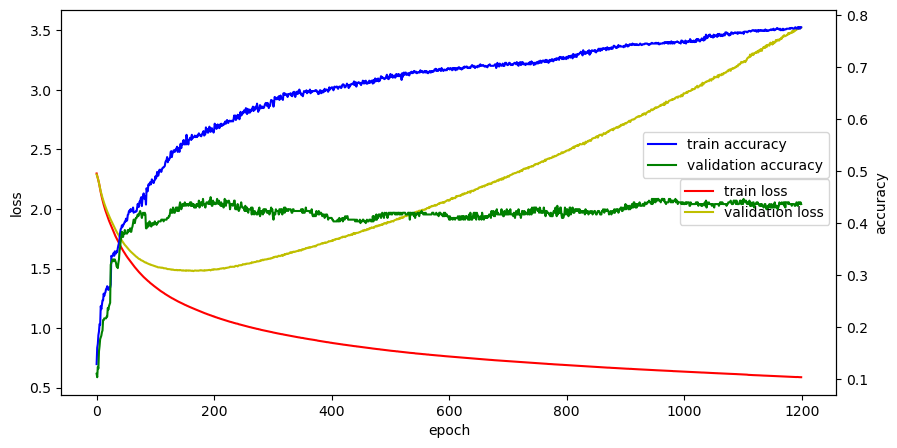

In [64]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수1

In [69]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 ==0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch, 
                        logs.get('loss'), 
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy')
                       ))
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
X_test  = X_test.reshape(-1,784).astype('float32')/255.0
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs   = np.random.choice(10000, 300)
X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val, Y_val),
                verbose=0,
                callbacks=[customHistory])

epoch:50, loss:1.6380081176757812, acc:0.42571428418159485, val_loss:1.6965980529785156, val_acc:0.3866666555404663
epoch:100, loss:1.4058711528778076, acc:0.5271428823471069, val_loss:1.4978641271591187, val_acc:0.4333333373069763
epoch:150, loss:1.2636847496032715, acc:0.6000000238418579, val_loss:1.400452733039856, val_acc:0.4866666793823242
epoch:200, loss:1.1582111120224, acc:0.631428599357605, val_loss:1.357744574546814, val_acc:0.49000000953674316
epoch:250, loss:1.0775539875030518, acc:0.6471428275108337, val_loss:1.341514229774475, val_acc:0.4866666793823242
epoch:300, loss:1.0099455118179321, acc:0.6614285707473755, val_loss:1.3457801342010498, val_acc:0.4933333396911621
epoch:350, loss:0.9502053260803223, acc:0.6971428394317627, val_loss:1.356201410293579, val_acc:0.5199999809265137
epoch:400, loss:0.8979095220565796, acc:0.699999988079071, val_loss:1.375916600227356, val_acc:0.5099999904632568
epoch:450, loss:0.8514965176582336, acc:0.7285714149475098, val_loss:1.4048414230

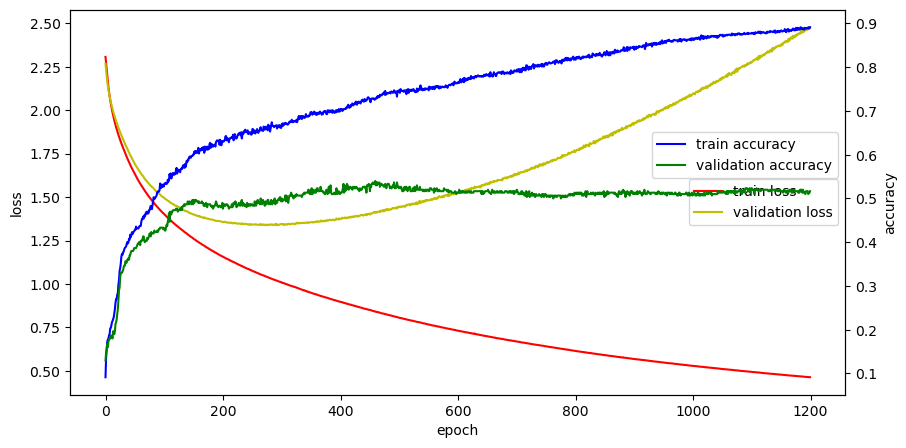

In [70]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수2 - Early Stopping(조기 종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [9]:
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
X_test  = X_test.reshape(-1,784).astype('float32')/255.0
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs   = np.random.choice(10000, 300)
X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
#earlyStopping = EarlyStopping(patience=2) # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
# earlyStopping = EarlyStopping(patience=2, 
#                     # val_accuracy가 연달아 2번이상 성능이 좋아지 않으면 stop
#                     monitor='val_accuracy' # loss, accuracy, val_loss(기본값), val_accuracy
#                     ) # 성급한 조기종료
earlyStopping = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val, Y_val),
                callbacks=[earlyStopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1200
7/7 [==============================] - 1s 25ms/step - loss: 2.2967 - accuracy: 0.1029 - val_loss: 2.2730 - val_accuracy: 0.1400
Epoch 2/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2802 - accuracy: 0.1271 - val_loss: 2.2561 - val_accuracy: 0.1400
Epoch 3/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2643 - accuracy: 0.1371 - val_loss: 2.2419 - val_accuracy: 0.1333
Epoch 4/1200
7/7 [==

Epoch 54/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.6881 - accuracy: 0.3686 - val_loss: 1.8015 - val_accuracy: 0.3033
Epoch 55/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6823 - accuracy: 0.3671 - val_loss: 1.7953 - val_accuracy: 0.3067
Epoch 56/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6770 - accuracy: 0.3671 - val_loss: 1.7924 - val_accuracy: 0.3067
Epoch 57/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6713 - accuracy: 0.3700 - val_loss: 1.7870 - val_accuracy: 0.3100
Epoch 58/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.6660 - accuracy: 0.3700 - val_loss: 1.7827 - val_accuracy: 0.3100
Epoch 59/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6609 - accuracy: 0.3671 - val_loss: 1.7787 - val_accuracy: 0.3067
Epoch 60/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.6556 - accuracy: 0.3700 - val_loss: 1.7743 - val_accuracy: 0.3133
Epoch 6

Epoch 112/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.4072 - accuracy: 0.5143 - val_loss: 1.5917 - val_accuracy: 0.4500
Epoch 113/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.4029 - accuracy: 0.5071 - val_loss: 1.5886 - val_accuracy: 0.4533
Epoch 114/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.3993 - accuracy: 0.5286 - val_loss: 1.5843 - val_accuracy: 0.4600
Epoch 115/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.3945 - accuracy: 0.5271 - val_loss: 1.5823 - val_accuracy: 0.4600
Epoch 116/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3905 - accuracy: 0.5243 - val_loss: 1.5792 - val_accuracy: 0.4600
Epoch 117/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.3861 - accuracy: 0.5286 - val_loss: 1.5755 - val_accuracy: 0.4667
Epoch 118/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.3823 - accuracy: 0.5286 - val_loss: 1.5723 - val_accuracy: 0.4700


7/7 [==============================] - 0s 9ms/step - loss: 1.0878 - accuracy: 0.6271 - val_loss: 1.4364 - val_accuracy: 0.5000
Epoch 227/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0860 - accuracy: 0.6286 - val_loss: 1.4374 - val_accuracy: 0.5000
Epoch 228/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0842 - accuracy: 0.6286 - val_loss: 1.4366 - val_accuracy: 0.5000
Epoch 229/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0826 - accuracy: 0.6271 - val_loss: 1.4347 - val_accuracy: 0.5033
Epoch 230/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0811 - accuracy: 0.6271 - val_loss: 1.4346 - val_accuracy: 0.5000
Epoch 231/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0790 - accuracy: 0.6300 - val_loss: 1.4350 - val_accuracy: 0.4967
Epoch 232/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0775 - accuracy: 0.6314 - val_loss: 1.4349 - val_accuracy: 0.5000
Epoch 233/1200
7/7

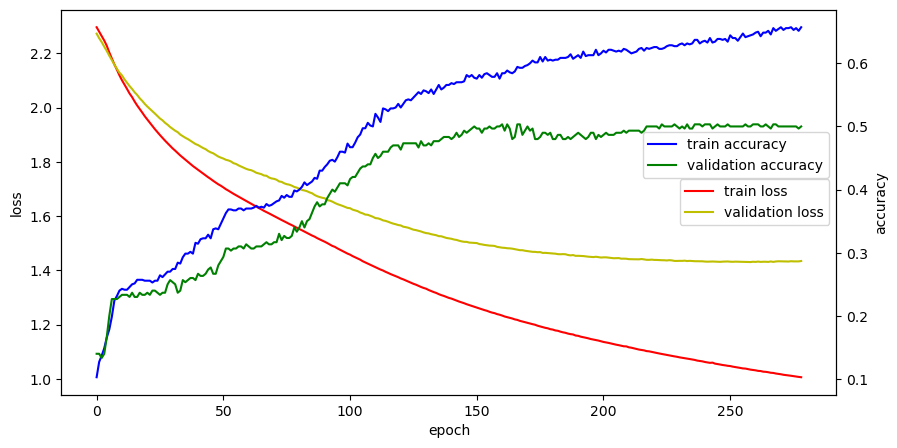

In [10]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어
- 활성화 함수 : 은닉층에는 주로 relu계열
- optimizer, epoch 등을 조정

In [23]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%5 ==0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch, 
                        logs.get('loss'), 
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy')
                       ))
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
X_test  = X_test.reshape(-1,784).astype('float32')/255.0
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# train_idxs = np.random.choice(50000, 700)
# val_idxs   = np.random.choice(10000, 300)
# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=64, activation='relu'))# https://keras.io/api/layers/activations/
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
#earlyStopping = EarlyStopping(patience=2) # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
# earlyStopping = EarlyStopping(patience=2, 
#                     # val_accuracy가 연달아 2번이상 성능이 좋아지 않으면 stop
#                     monitor='val_accuracy' # loss, accuracy, val_loss(기본값), val_accuracy
#                     ) # 성급한 조기종료
earlyStopping = EarlyStopping(patience=20)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100,
                 validation_data=(X_val, Y_val),
                callbacks=[earlyStopping, customHistory],
                verbose=0)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dense_40 (Dense)            (None, 16)                1040      
                                                                 
 dense_41 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________
None
epoch:5, loss:0.1053483784198761, acc:0.9694799780845642, val_loss:0.11616440117359161, val_acc:0.9671000242233276
epoch:10, loss:0.05426989123225212, acc:0.9840800166130066, val_loss:0.1045357808470726, val_acc:0.9704999923706055
epoch:15, loss:0.029993750154972076, acc:0.991320013999939, val_loss:0.112474

## 5. 모델 평가(그래프, 평가함수)

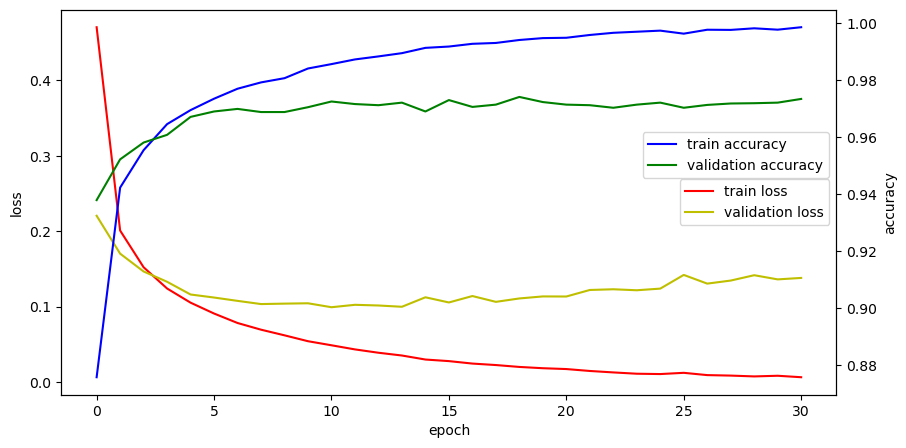

In [24]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [25]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9717
loss : 0.15392395853996277
accuracy : 0.9717000126838684


## 6. 모델 저장
- 1. 학습된 모델 저장 : h5파일 (모델 로드시 추가 학습이 필요X)
- 2. 모델 구성만 저장 : json파일 (모델 로드시 추가 학습이 필요 o)

In [27]:
# 1. 학습된 모델 저장
model.save('model/mnist.h5')

In [28]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dense_40 (Dense)            (None, 16)                1040      
                                                                 
 dense_41 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9717


[0.15392394363880157, 0.9717000126838684]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


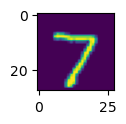

In [35]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0].reshape(28,28))
print(Y_test[0])
print(Y_test[0].argmax())
plt.show()

In [36]:
# 모델 사용하기
X_test[0].shape

(784,)

In [48]:
result = model2.predict(X_test[0].reshape(1,784))
print('실제값(원핫인코딩) :', Y_test[0])
print('실제값 :', Y_test[0].argmax())
print('예측값(원핫인코딩) :', [round(r, 5) for r in result[0]])
print('예측값 :', result.argmax())

1/1 [==============================] - 0s 23ms/step
실제값(원핫인코딩) : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
실제값 : 7
예측값(원핫인코딩) : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
예측값 : 7


In [49]:
# 2. 모델의 구조만 저장
model_json = model.to_json()
with open('model/mnist.json', 'w') as f:
    f.write(model_json)

In [50]:
# 저장된 모델 구성 가져오기
with open('model/mnist.json', 'r') as f:
    model_json2 = f.read()

In [52]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary() # 학습전 모델

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dense_40 (Dense)            (None, 16)                1040      
                                                                 
 dense_41 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3501 - accuracy: 0.1001


[2.350062608718872, 0.10010000318288803]

In [54]:
model3.fit(X_train, Y_train, epochs=100, batch_size=500,
          validation_data=[X_val, Y_val],
          callbacks=[earlyStopping])

Epoch 1/100
100/100 [==============================] - 1s 9ms/step - loss: 0.9936 - accuracy: 0.6983 - val_loss: 0.3791 - val_accuracy: 0.9001
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 0.3300 - accuracy: 0.9088 - val_loss: 0.2599 - val_accuracy: 0.9268
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2556 - accuracy: 0.9273 - val_loss: 0.2179 - val_accuracy: 0.9390
Epoch 4/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2171 - accuracy: 0.9374 - val_loss: 0.1931 - val_accuracy: 0.9466
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1887 - accuracy: 0.9464 - val_loss: 0.1725 - val_accuracy: 0.9545
Epoch 6/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1680 - accuracy: 0.9521 - val_loss: 0.1562 - val_accuracy: 0.9577
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1502 - accuracy: 0.9565 - val_loss: 0.1481 - val_accuracy: 0.9588

In [55]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1202 - accuracy: 0.9700


[0.12018061429262161, 0.9700000286102295]

In [ ]:
# 다중분류의 교차표

In [62]:
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
X_test  = X_test.reshape(-1,784).astype('float32')/255.0
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
model = load_model('model/mnist.h5')

In [64]:
Y_test.argmax(axis=1) # 실제값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [70]:
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name = '실제'
ctab.columns.name = '예측'
ctab

예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,971,0,0,0,0,0,4,1,3,1
1,0,1124,2,2,0,1,2,2,2,0
2,4,2,995,9,2,0,2,8,10,0
3,0,0,1,986,0,3,1,7,4,8
4,3,0,3,0,958,0,5,1,3,9
5,4,1,0,26,3,844,6,1,4,3
6,4,2,3,1,7,1,937,0,3,0
7,3,4,8,6,1,0,0,997,3,6
8,7,0,2,10,6,0,2,6,938,3


실제
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64